#Evaluación Final Módulo 6

Utilizaremos un set de datos de las policias de New York del año 2009 y 2010. (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán información de los procedimientos policiales realizados. Además se le entregará el diccionario de variables para que pueda consultar que significa cada categoría dentro de las variables.

● La variable respuesta 'arstmade' informa si los procedimientos policiales han terminado en arresto o no, y el objetivo será realizar un modelo de Machine Learning para predecir si un futuro procedimiento terminará en arresto.

1.- Enliste todas las librerias que utilizará Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya teniendo durante el desarrollo de la prueba

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

2.- Importación y revisión de los datos Importe ambos sets. Dado que la fuente de datos proviene de la misma base, tienen las mismas columnas. 

In [22]:
df_2009 = pd.read_csv('2009_1perc.csv')
df_2010 = pd.read_csv('2010_1perc.csv')

Consolide ambos sets y reporte una exploración básica de los datos (numero de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)

In [23]:
df = pd.concat([df_2009, df_2010])

print("Número de filas y columnas:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nEstadísticas básicas:\n", df.describe())
print("\nCasos perdidos:\n", df.isnull().sum())

Número de filas y columnas: (11825, 112)

Tipos de datos:
 Unnamed: 0     int64
year           int64
pct            int64
ser_num        int64
datestop       int64
               ...  
xcoord        object
ycoord        object
dettypcm      object
linecm        object
detailcm      object
Length: 112, dtype: object

Estadísticas básicas:
           Unnamed: 0          year           pct       ser_num      datestop  \
count   11825.000000  11825.000000  11825.000000  11825.000000  1.182500e+04   
mean   295983.814799   2009.508499     68.625624   5697.994334  6.364221e+06   
std    170820.705702      0.499949     33.037826   5152.486022  3.429091e+06   
min        52.000000   2009.000000      1.000000      1.000000  1.012009e+06   
25%    147515.000000   2009.000000     42.000000   2002.000000  3.232009e+06   
50%    296652.000000   2010.000000     73.000000   4366.000000  6.162010e+06   
75%    443097.000000   2010.000000    102.000000   7840.000000  9.232009e+06   
max    601281.00000

3.- Preprocesamiento de datos

Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los siguientes pasos para limpiar este set:

● 3.1 Obtenga una lista con todas las variables categoricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas.


In [24]:
categorical_vars = []
for column in df.columns:
    if df[column].dtype == 'object' and df[column].nunique() >= 2 and df[column].nunique() <= 99:
        categorical_vars.append(column)

● 3.2 Reemplaze las siguientes clases faltantes:

-Si alguna categoría de las columnas officrid, offshld o offverb es igual a "" cambielo a 'N' y en caso contrario dejelo como 'Y'

-Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA,
dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso
contrario mantenga su valor
Nota, los valores significan {N: No, Y: Yes, U: Unknown}


In [25]:
# chequeo existencia de los valores señalados a ser modificados
print('officrid ', len(df.loc[df['officrid'] != ' ', 'officrid']))
print('officrid " " ', len(df.loc[df['officrid'] == ' ', 'officrid']))

print('offshld ', len(df.loc[df['offshld'] != ' ', 'offshld']))
print('offshld " " ', len(df.loc[df['offshld'] == ' ', 'offshld']))

print('offverb ', len(df.loc[df['offverb'] != ' ', 'offverb']))
print('offverb " " ', len(df.loc[df['offverb'] == ' ', 'offverb']))

print('sector ', len(df.loc[df['sector'] == ' ', 'sector']))
print('trhsloc ', len(df.loc[df['trhsloc'] == ' ', 'trhsloc']))
print('beat ', len(df.loc[df['beat'] == ' ', 'beat']))

officrid  161
officrid " "  11664
offshld  3250
offshld " "  8575
offverb  2579
offverb " "  9246
sector  289
trhsloc  205
beat  7444


In [26]:
df.loc[df['officrid'] != ' ', 'officrid'] = 'Y'
df.loc[df['officrid'] == ' ', 'officrid'] = 'N'

df.loc[df['offshld'] != ' ', 'offshld'] = 'Y'
df.loc[df['offshld'] == ' ', 'offshld'] = 'N'

df.loc[df['offverb'] != ' ', 'offverb'] = 'Y'
df.loc[df['offverb'] == ' ', 'offverb'] = 'N'

df.loc[df['sector'] == ' ', 'sector'] = 'U'
df.loc[df['trhsloc'] == ' ', 'trhsloc'] = 'U'
df.loc[df['beat'] == ' ', 'beat'] = 'U'

In [27]:
# chequeo existencia de los valores señalados a ser modificados
print('officrid Y ', len(df.loc[df['officrid'] == 'Y', 'officrid']))
print('officrid N ', len(df.loc[df['officrid'] == 'N', 'officrid']))

print('offshld Y ', len(df.loc[df['offshld'] == 'Y', 'offshld']))
print('offshld N ', len(df.loc[df['offshld'] == 'N', 'offshld']))

print('offverb Y ', len(df.loc[df['offverb'] == 'Y', 'offverb']))
print('offverb N ', len(df.loc[df['offverb'] == 'N', 'offverb']))

print('sector ', len(df.loc[df['sector'] == 'U', 'sector']))
print('trhsloc ', len(df.loc[df['trhsloc'] == 'U', 'trhsloc']))
print('beat ', len(df.loc[df['beat'] == 'U', 'beat']))

officrid Y  161
officrid N  11664
offshld Y  3250
offshld N  8575
offverb Y  2579
offverb N  9246
sector  293
trhsloc  205
beat  7444


● 3.3 Transforme las columnas ht_feet junto con ht_inch en una única
columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)


In [28]:
df['meters'] = (df['ht_feet'] + df['ht_inch']) * 0.3048

● 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna
datestop. Genere 2 nuevas columnas llamadas month y year que solo
tenga el mes y el año respectivamente.
Hint: Explore la libreria lubridate https://www.rstudio.com/resources/cheatsheets/


In [29]:
df['month'] = df['datestop'].apply(lambda x: str(x)[0:2])
df['year'] = df['datestop'].apply(lambda x: str(x)[-4:])

In [30]:
# Mostrar los cambios realizados
print("Variables categóricas:")
print(categorical_vars)
print("\nColumnas actualizadas:")
print(df.head(5))

Variables categóricas:
['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers', 'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'addrtyp', 'city', 'sector', 'beat', 'dettypcm', 'linecm']

Columnas actualizadas:
   Unnamed: 0  year  pct  ser_num  datestop  timestop recstat inout trhsloc  \
0      178048  2009   41     17

● 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades esten entre 18 y 100 años, ambos inclusive.

In [31]:
selected_columns = categorical_vars + ['month', 'year', 'meters', 'age']
filtered_df = df[selected_columns]

# Filtrar los registros cuyas edades estén entre 18 y 100 años, ambos inclusive
filtered_df = filtered_df[(filtered_df['age'] >= 18) & (filtered_df['age'] <= 100)]

# Mostrar el DataFrame filtrado
print(filtered_df.head(5))

  recstat inout trhsloc typeofid explnstp othpers arstmade sumissue offunif  \
0       A     O       P        P        Y       N        N        N       Y   
2       1     O       P        V        Y       N        N        N       N   
3       A     O       P        P        Y       N        N        N       Y   
4       A     O       P        P        Y       Y        N        N       Y   
5       1     I       T        V        Y       N        N        N       N   

  officrid  ... addrtyp       city sector beat dettypcm linecm month  year  \
0        N  ...       L      BRONX      G    7       CM      1    40  2009   
2        N  ...       L      BRONX      E    U       CM      1    10  2009   
3        N  ...       L   BROOKLYN      J    4       CM      1    12  2009   
4        N  ...       L     QUEENS      H    U       CM      1    12  2009   
5        Y  ...       L  MANHATTAN      F   16       CM      1    52  2009   

   meters age  
0  4.2672  24  
2  2.7432  21  
3  3.048

4.- Análisis exploratorio

● 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente


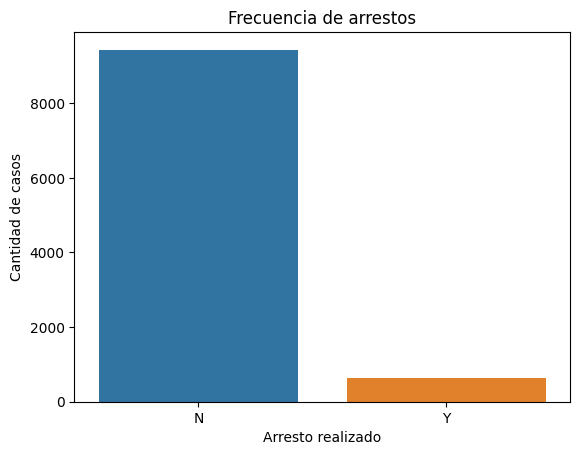

In [32]:
sns.countplot(x='arstmade', data=filtered_df)
plt.title('Frecuencia de arrestos')
plt.xlabel('Arresto realizado')
plt.ylabel('Cantidad de casos')
plt.show()

● 4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.


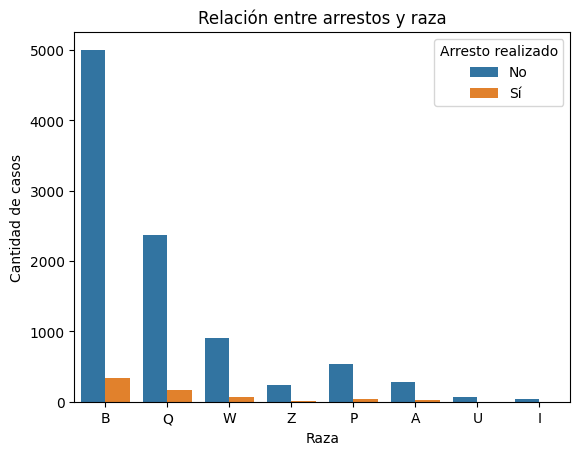

In [33]:
sns.countplot(x='race', hue='arstmade', data=filtered_df)
plt.title('Relación entre arrestos y raza')
plt.xlabel('Raza')
plt.ylabel('Cantidad de casos')
plt.legend(title='Arresto realizado', labels=['No', 'Sí'])
plt.show()

Respecto a las razas y los arrestos hay una tendencia sobre la raza B, esto tiene implicancias éticas a considerar, en la región pueden estar presentente factores socio-económicos, quizas exista una brecha que ocasione un importante desmedro o falta de oportunidades que los lleve a cometer más delitos o que puediera existir aún discriminación racial por parte de las policias.

● 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.


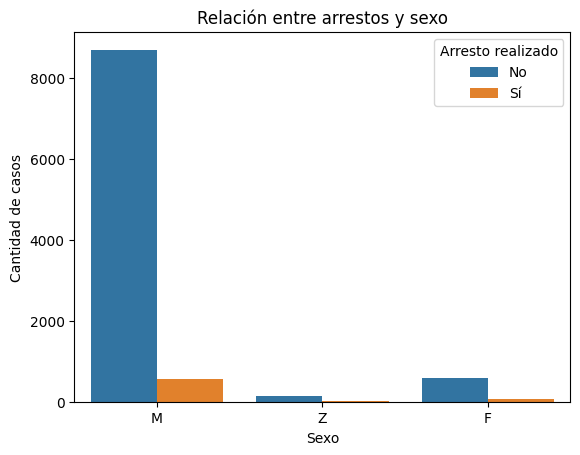

In [34]:
sns.countplot(x='sex', hue='arstmade', data=filtered_df)
plt.title('Relación entre arrestos y sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de casos')
plt.legend(title='Arresto realizado', labels=['No', 'Sí'])
plt.show()

● 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo y la edad en su conjunto, comente.


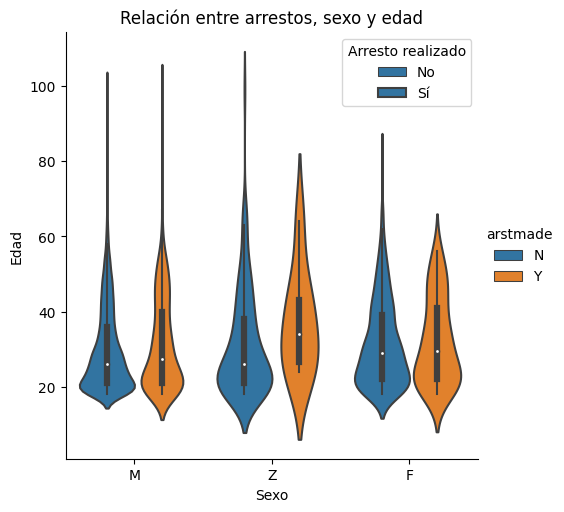

In [35]:
sns.catplot(x='sex', y='age', hue='arstmade', data=filtered_df, kind='violin')
plt.title('Relación entre arrestos, sexo y edad')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.legend(title='Arresto realizado', labels=['No', 'Sí'])
plt.show()

In [36]:
# prueba algoritmo regresión logística para evaluar métricas
# Split datos de entrenamiento y prueba
X = filtered_df[["sex", "age"]]
X = pd.get_dummies(X, drop_first=True)
y = filtered_df["arstmade"]
model = LogisticRegression(max_iter=1000)
# Entrenar el modelo
model.fit(X, y)
# coeficientes ecuación de la recta
coeficientes = model.coef_
intercept = model.intercept_[0]
predictores = X.columns.tolist()
predictores.append("constante")
coeficientes = coeficientes[0].tolist()
coeficientes.append(intercept)
coef = pd.Series(coeficientes, predictores).sort_values()

print(coef)

constante   -2.544334
sex_Z       -0.572779
sex_M       -0.470923
age          0.009730
dtype: float64


In [37]:
# La relación de la variable sexo no dice mucho.

● 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y


In [38]:
filtered_df['arstmade_recoded'] = filtered_df['arstmade'].map({'N': 0, 'Y': 1})

● 4.5 Muestre en un gráfico la probabilidad que un individuo sea
arrestado,condicional al género y a la raza. 

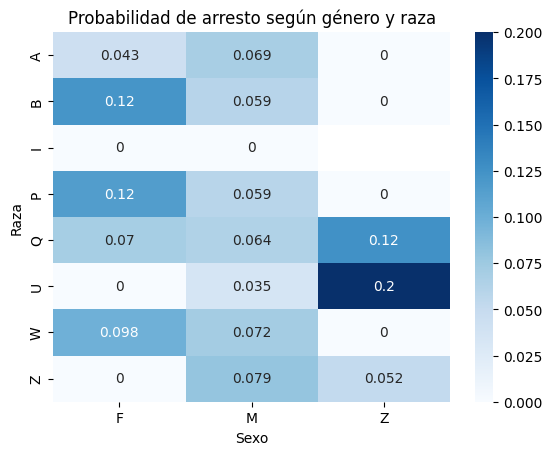

In [39]:
arrest_prob = filtered_df.groupby(['race', 'sex'])['arstmade_recoded'].mean().unstack()
sns.heatmap(data=arrest_prob, annot=True, cmap='Blues')
plt.title('Probabilidad de arresto según género y raza')
plt.xlabel('Sexo')
plt.ylabel('Raza')
plt.show()

¿qué implicancias éticas tienen algunas conclusiones de lo que observa?.

In [40]:
# en mi opinión, aunque el tema racial es un factor contraversial claramente esta presente en los datos del dataset e inevitablemente
# es parte de nuestra realidad y precondiciona el actual del los individuos y trastoca valores éticos.

5.- Determinar si el procedimiento policial concluirá en alguna acción violenta.

Los atributos que tienen el prefijo pf (['pf_hands'],['pf_wall'], ['pf_grnd'], ['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']) indican si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la
marca 'Y'.

Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje de casos que terminaron con violencia.

In [41]:
# Generar la variable 'violencia'
pf_columns = ['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other']
filtered_df['violencia'] = filtered_df[pf_columns].apply(lambda row: 1 if 'Y' in row.values else 0, axis=1)

# Calcular el porcentaje de casos con violencia
porcentaje_violencia = (filtered_df['violencia'].sum() / len(filtered_df)) * 100

print("Porcentaje de casos con violencia: {:.2f}%".format(porcentaje_violencia))

Porcentaje de casos con violencia: 24.18%


6.- Modelación

● 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test utilizando el año 2009 para entrenar, y el año 2010 para testear.

In [42]:
# Generar variables dummies
df_dummies = pd.get_dummies(filtered_df.drop(['arstmade_recoded'], axis=1))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data = df_dummies[df_dummies['year_2009'] == 1]   # 4981 registros
test_data = df_dummies[df_dummies['year_2010'] == 1]    # 5091 registros

# Obtener las variables de entrada y la variable objetivo para entrenamiento y prueba
X_train = train_data.drop(['arstmade_Y','arstmade_N'], axis=1)  
y_train = train_data['arstmade_Y']   # 646 registros terminaron en arresto, artstmade_N contiene los que no fueron arrestado 
X_test = test_data.drop(['arstmade_Y','arstmade_N'], axis=1)
y_test = test_data['arstmade_Y']  # 646 registros terminaron en arresto, artstmade_N contiene los que no fueron arrestado 


● 6.2 Entrene 2 modelos de clasificación y reporte el mejor modelo bajo algún criterio.

In [43]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Entrenar modelo de Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
logreg_pred = logreg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluar los modelos
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Comparar los modelos
if logreg_f1 > rf_f1:
    best_model = "Regresión Logística"
    best_accuracy = logreg_accuracy
    best_precision = logreg_precision
    best_recall = logreg_recall
    best_f1 = logreg_f1
else:
    best_model = "Random Forest"
    best_accuracy = rf_accuracy
    best_precision = rf_precision
    best_recall = rf_recall
    best_f1 = rf_f1

# Reportar el mejor modelo
print("Mejor modelo: ", best_model)
print("Exactitud: ", best_accuracy)
print("Precisión: ", best_precision)
print("Recall: ", best_recall)
print("F1-Score: ", best_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mejor modelo:  Regresión Logística
Exactitud:  0.9652327637006483
Precisión:  0.8286852589641435
Recall:  0.6081871345029239
F1-Score:  0.7015177065767284


Bonus (20 pts)
¿Que puede hacer para mejorar la predicción de los modelos?

Hay variedad de ténicas para mejorar la predicción del modelo, una de ellas y en el mejor de los casos, se podría aumentar el número de ejemplos para entrenamiento, eliminar o manipular los valores outlier o atípicos, disminuir o quitar variables menos relevantes para no caer en "la maldición de la dimensionalidad", aplicando un algotirmo como el PCA para reducir el número de componentes con variables sin correlación y tal vez hacer un mejor procesamiento de características pero lo más indicado para los datos existentes, es ajustar los hiperparámetros en el modelo random forest, como por ejemplo probar niveles de profundidad pero sin caer en overfitting aunque lo mejor es observar las variables relevantes de los gráficos que se muestran a continuación.

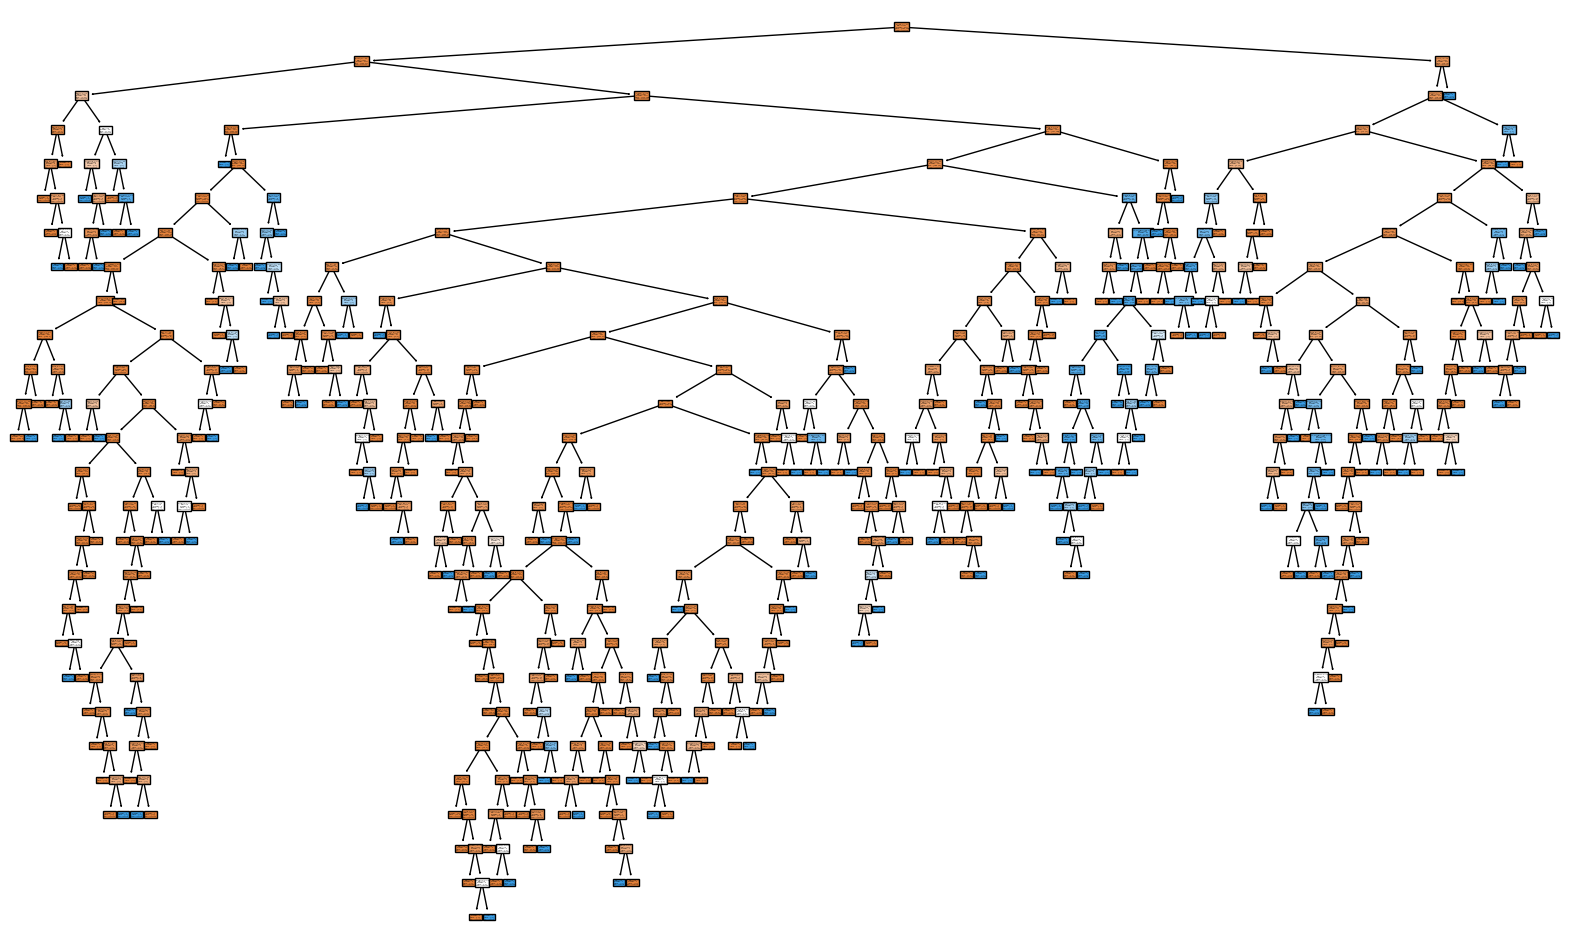

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn import tree

# Get the decision tree structure from the Random Forest
trees = rf_model.estimators_


# Compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)
# Display the decision tree structure
plt.figure(figsize=(20, 12))
_ = tree.plot_tree(
    trees[-1],
    feature_names=list(X_train.columns.values),
    class_names=np.array(['Negativo','Positivo']),
    filled=True
)

Text(0, 0.5, 'Feature')

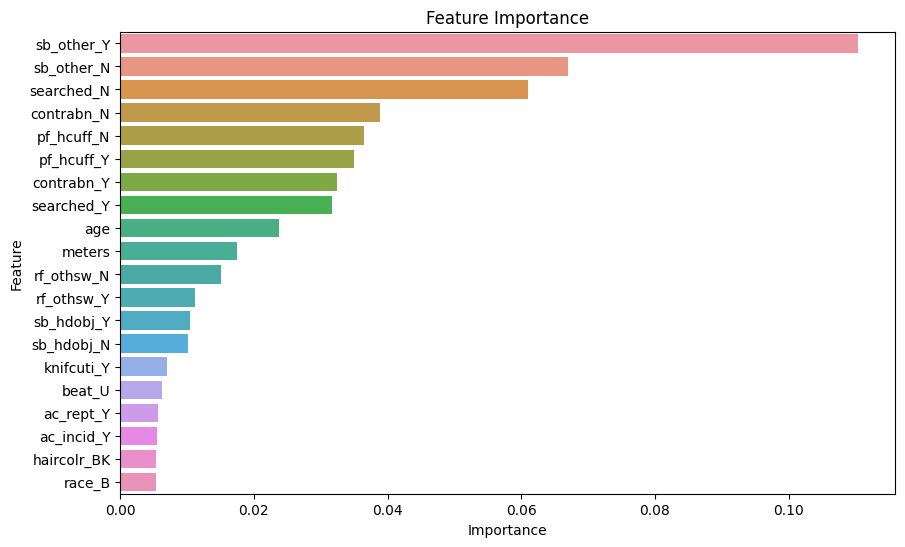

In [45]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame(
    {'Feature': list(X_train.columns.values), 'Importance': importances}
)

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importances[:20], ax=ax)

# Set the title and labels
ax.set_title('Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

Tal vez, desde aquí volver a entrenar el modelo, esta vez con un nuevo dataset con los componentes principales o más relevantes resultantes producto de aplicar un algoritmo como el pca, realizar los ajuste e iterar para observar mejores resultados del modelo.